In [1]:
# Copyright (C) 2023 Antonio Rodriguez
# 
# This file is part of T1DM_WARIFA.
# 
# T1DM_WARIFA is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# T1DM_WARIFA is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with T1DM_WARIFA.  If not, see <http://www.gnu.org/licenses/>.

import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from typing import Dict

import sys 
sys.path.append("..")

from utils import *

from sensor_params import *

from models.multi_step.naive_model import *
from models.multi_step.naive_model import naive_model as get_naive_multi_step

from evaluation.multi_step.evaluation import model_evaluation as multi_step_model_evaluation
from evaluation.multi_step.evaluation import model_evaluation_close_loop as multi_step_model_evaluation_refeed

 # Dictionaty with the configurations to train all models 
from training_configs import * 

# Dataset path 
DATABASE_PATH = r"C:\Users\aralmeida\OneDrive - Universidad de Las Palmas de Gran Canaria\Doctorado\Bases de datos\WARIFA\Mikael T1DM"

filename = "MIKAEL_data.json"

parent_directory = r"C:\Users\aralmeida\Downloads"
experiments_folder = r"\T1DM_pred_experiments"

with open(DATABASE_PATH+'\CGM.pk1', 'rb') as f:
    sgv_data_dict = pickle.load(f)
os.chdir(parent_directory)

pene = {'sensor' : [sensor_Mikael],
                'N' : [96], 
                'step' : [1], 
                'PH' : [60], 
                'single_multi_step' : ['multi'],
                'partition' : ['month-wise-4-folds'],
                'normalization' : ['min-max'],
                'under_over_sampling' : [None], 
                'model' : ['naive'],
                'loss_function' : ['root_mean_squared_error'], 
                }


# Test name (Dictionary with the stored configuration. Check 'training_configs.py')
test = pene

# Counter 
i = 0
total_exps = len(test['sensor'])*len(test['N'])*len(test['step'])*len(test['PH'])*len(test['single_multi_step'])*len(test['partition'])*len(test['normalization'])*len(test['under_over_sampling'])*len(test['model'])*len(test['loss_function'])

# If not created, create a dictionary
results_dictionary = create_results_dictionary(parent_directory, experiments_folder)

# Avoid the generation of figures
# plt.ioff()


Dictionary loaded.



Dictionary entry created.

~~~~~~~~~~~~~~~~~~~~~~~~~~
Running experiment 1/1:

Configuration:
sensor = mikael_sensor
N = 96
step = 1
PH = 60
single/multi step = multi
partition = month-wise-4-folds
norm = min-max
under-over = None
model : naive
loss funcion = root_mean_squared_error

Number of blocks is 335

Naive model evaluation. Training step not needed.
naive Test RMSE in all time steps:   43.4174
naive Test MAE in all time steps:   32.40004
naive Test MAPE in all time steps:   26.376602053642273


naive Test RMSE in each time step:   [43.33455  43.35364  43.37474  43.393806 43.40998  43.42079  43.430637
 43.44016  43.44796  43.450428 43.44856  43.447876]
naive Test MAE in each time step:   [32.350704 32.36333  32.37708  32.388977 32.39896  32.40612  32.41269
 32.41857  32.422977 32.42362  32.419693 32.417732]
naive Test MAPE in each time step:   [26.34165  26.350508 26.361496 26.369043 26.37484  26.379028 26.383492
 26.387606 26.390871 26.391253 26.389149 26.403397]


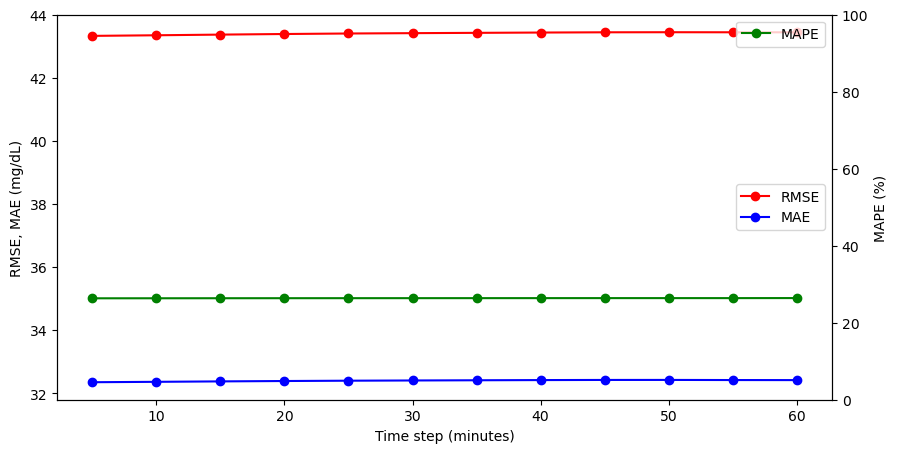

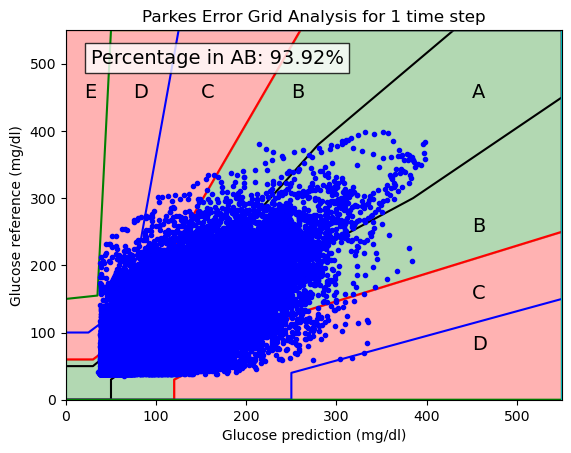

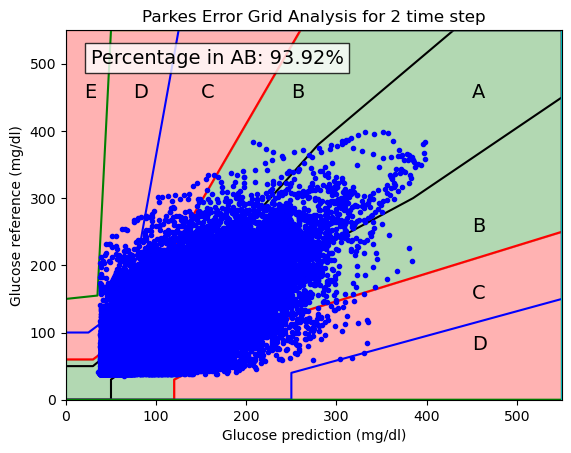

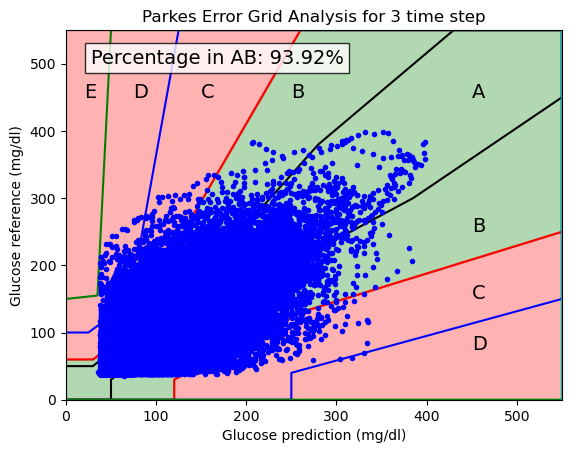

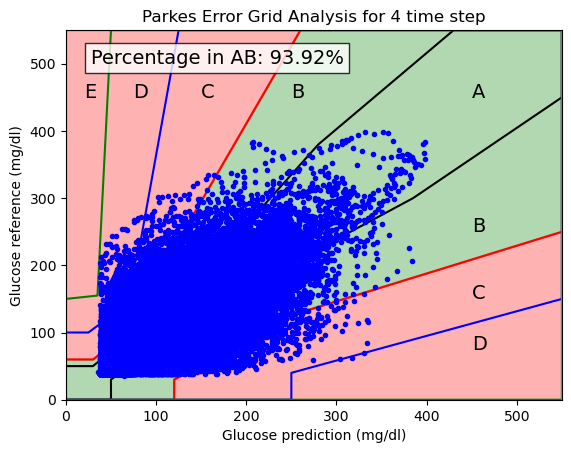

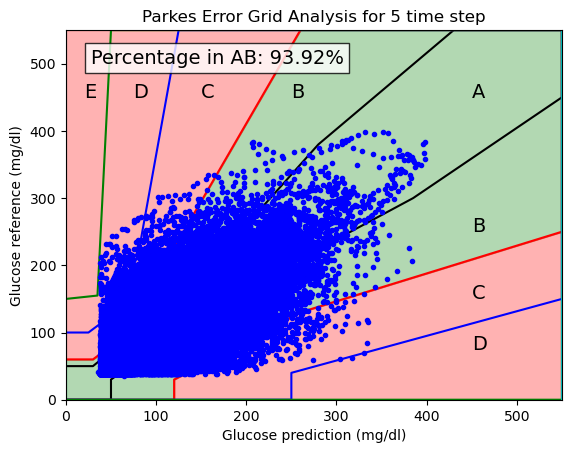

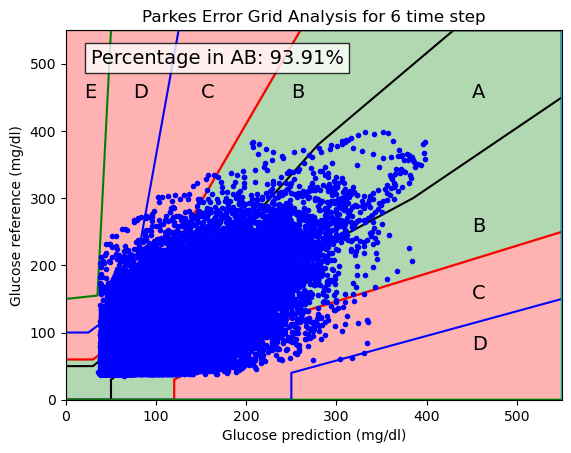

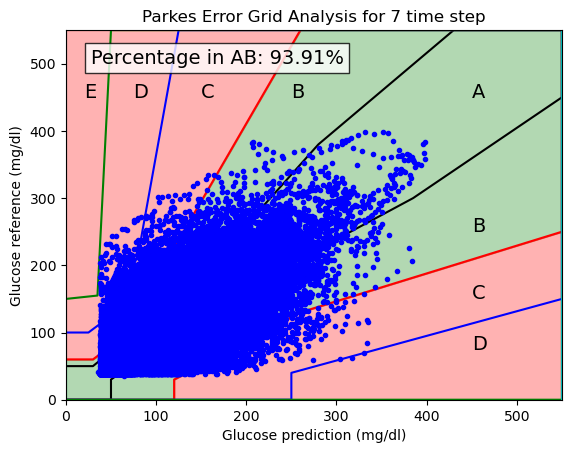

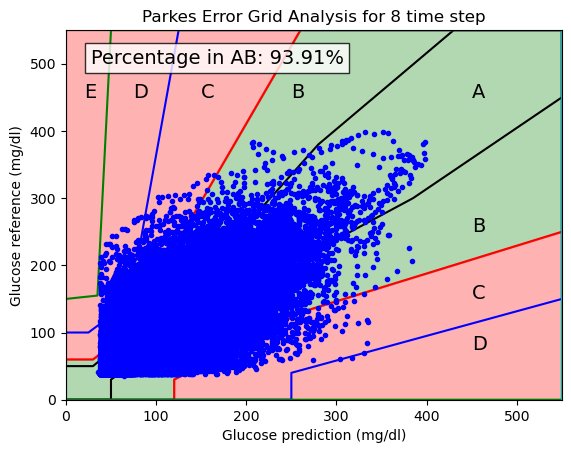

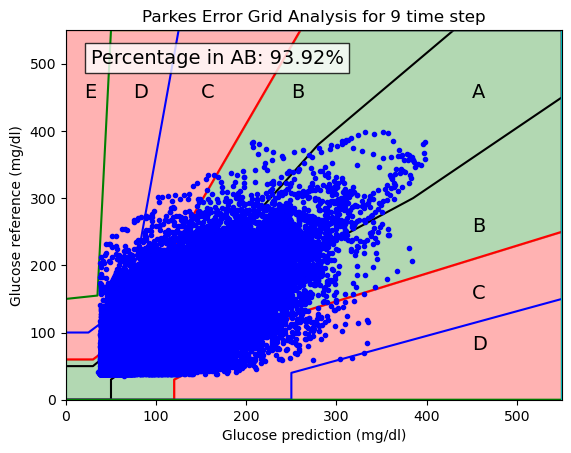

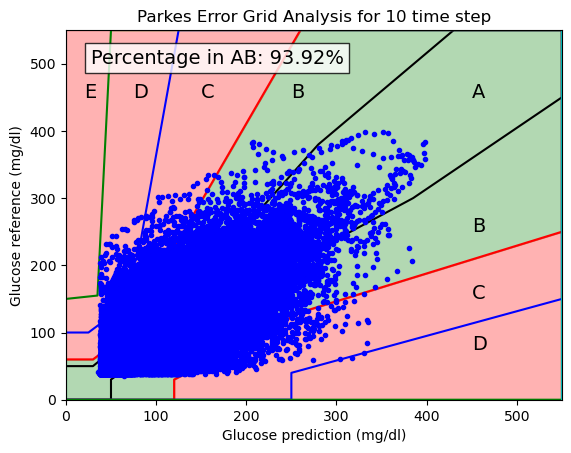

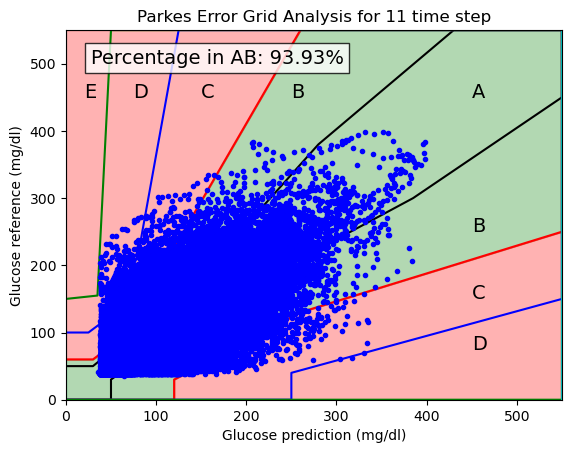

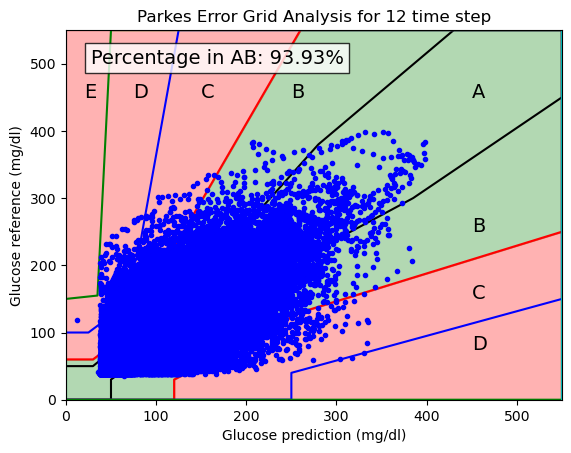

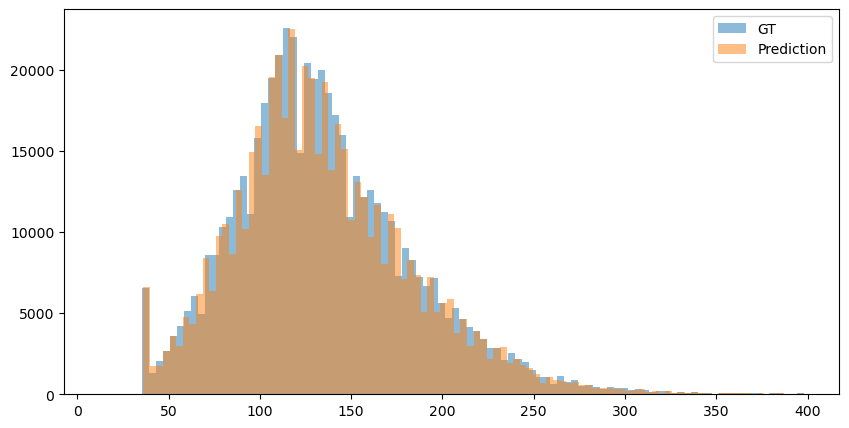

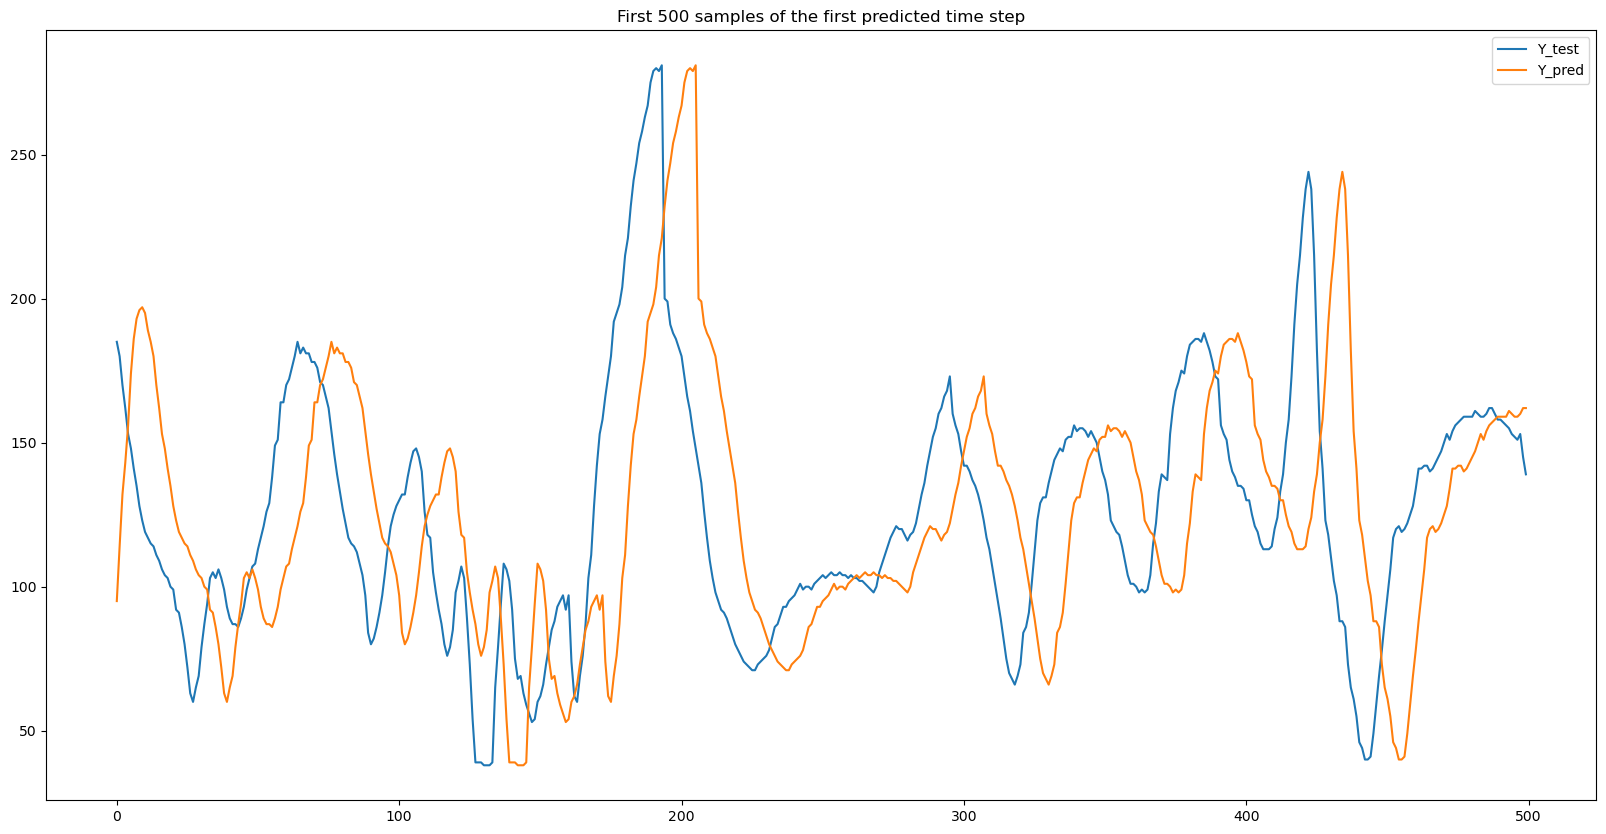

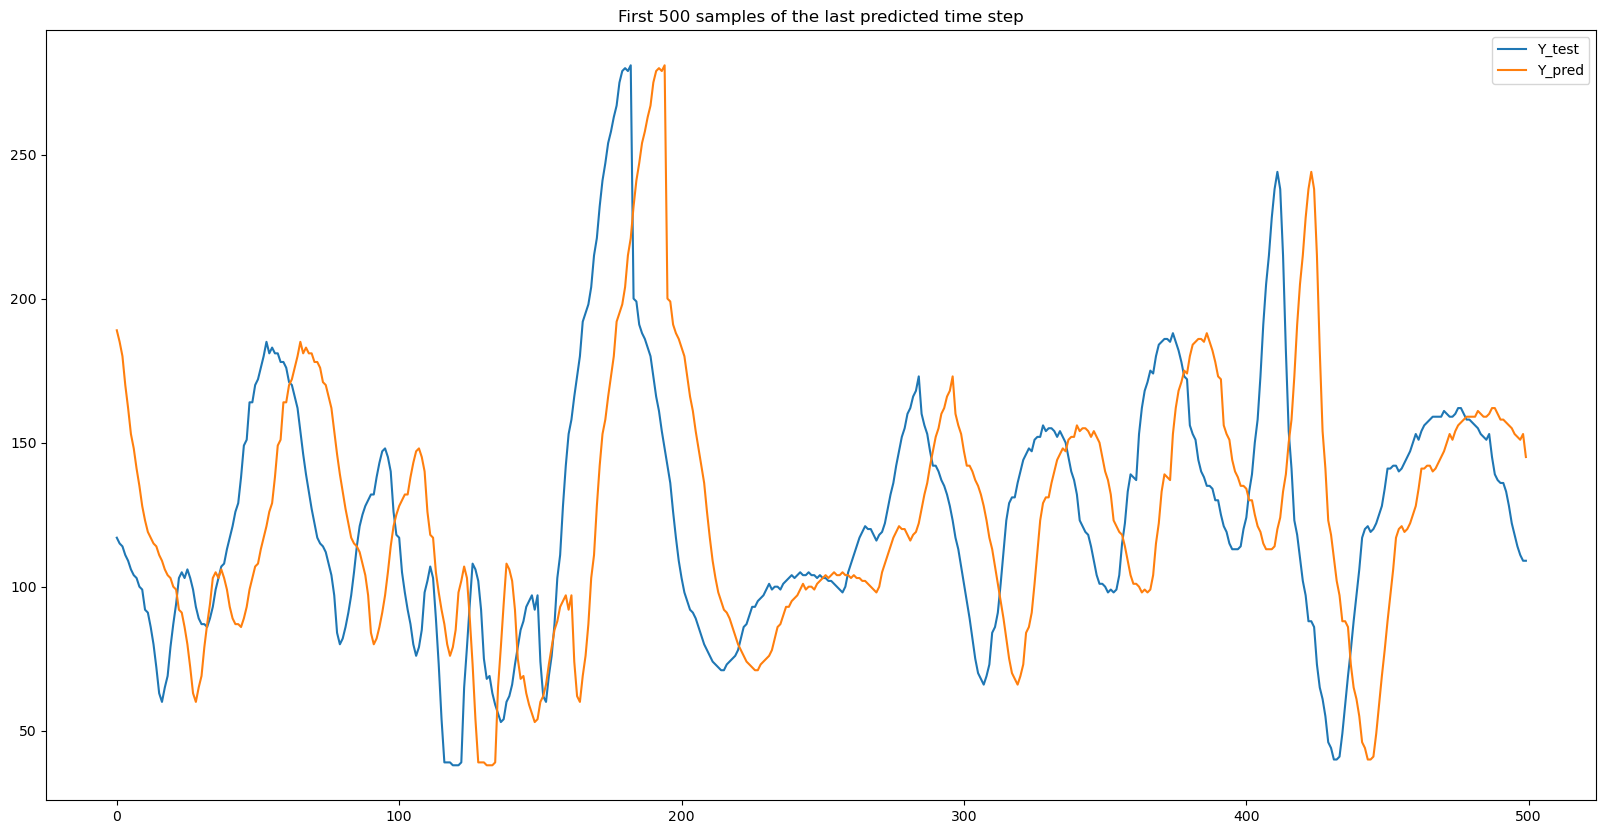

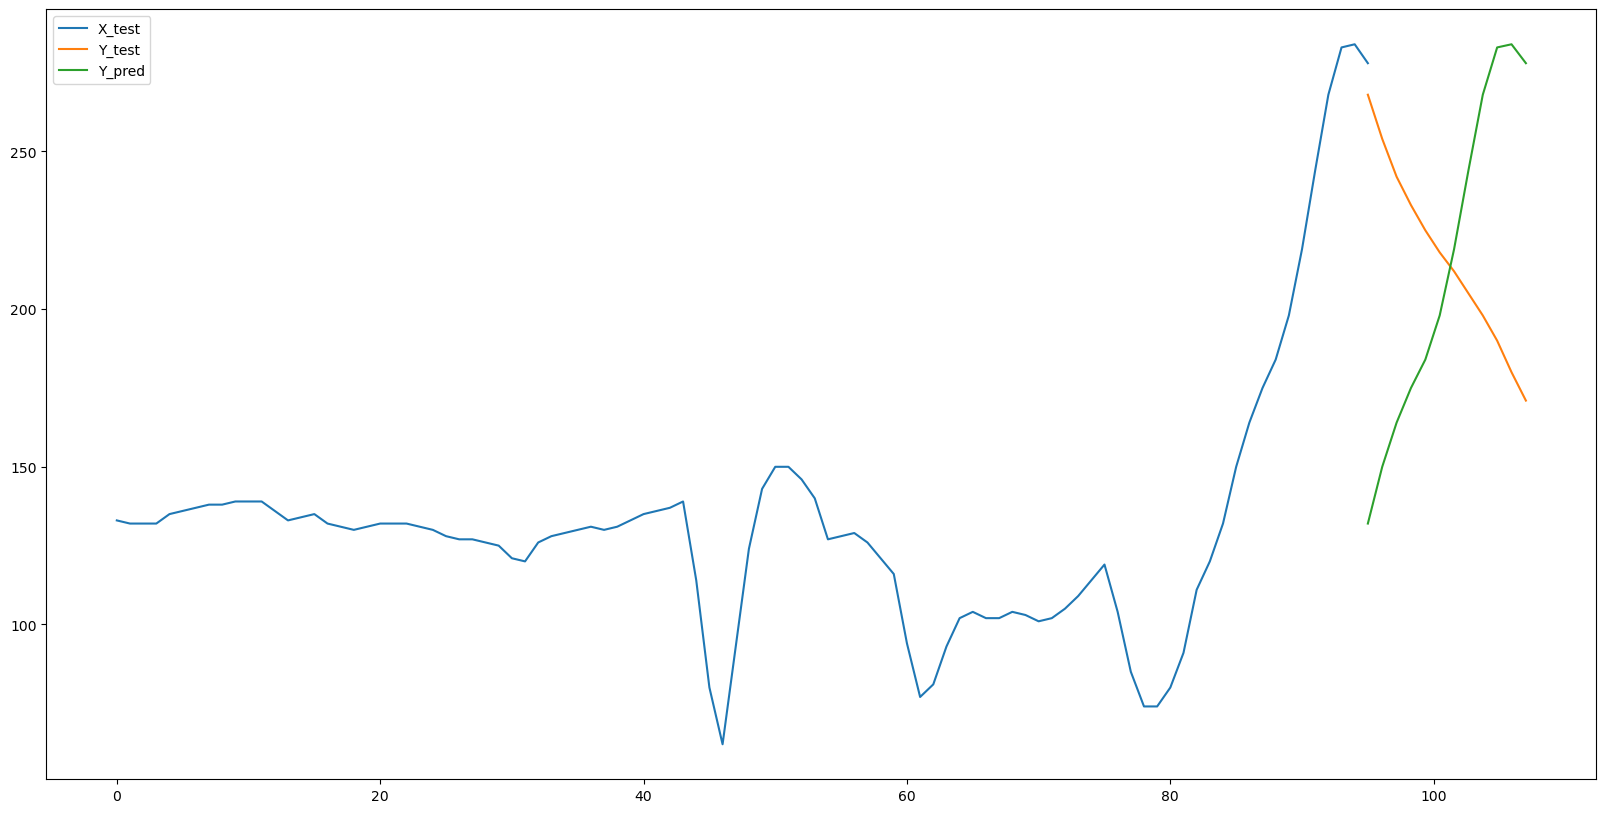

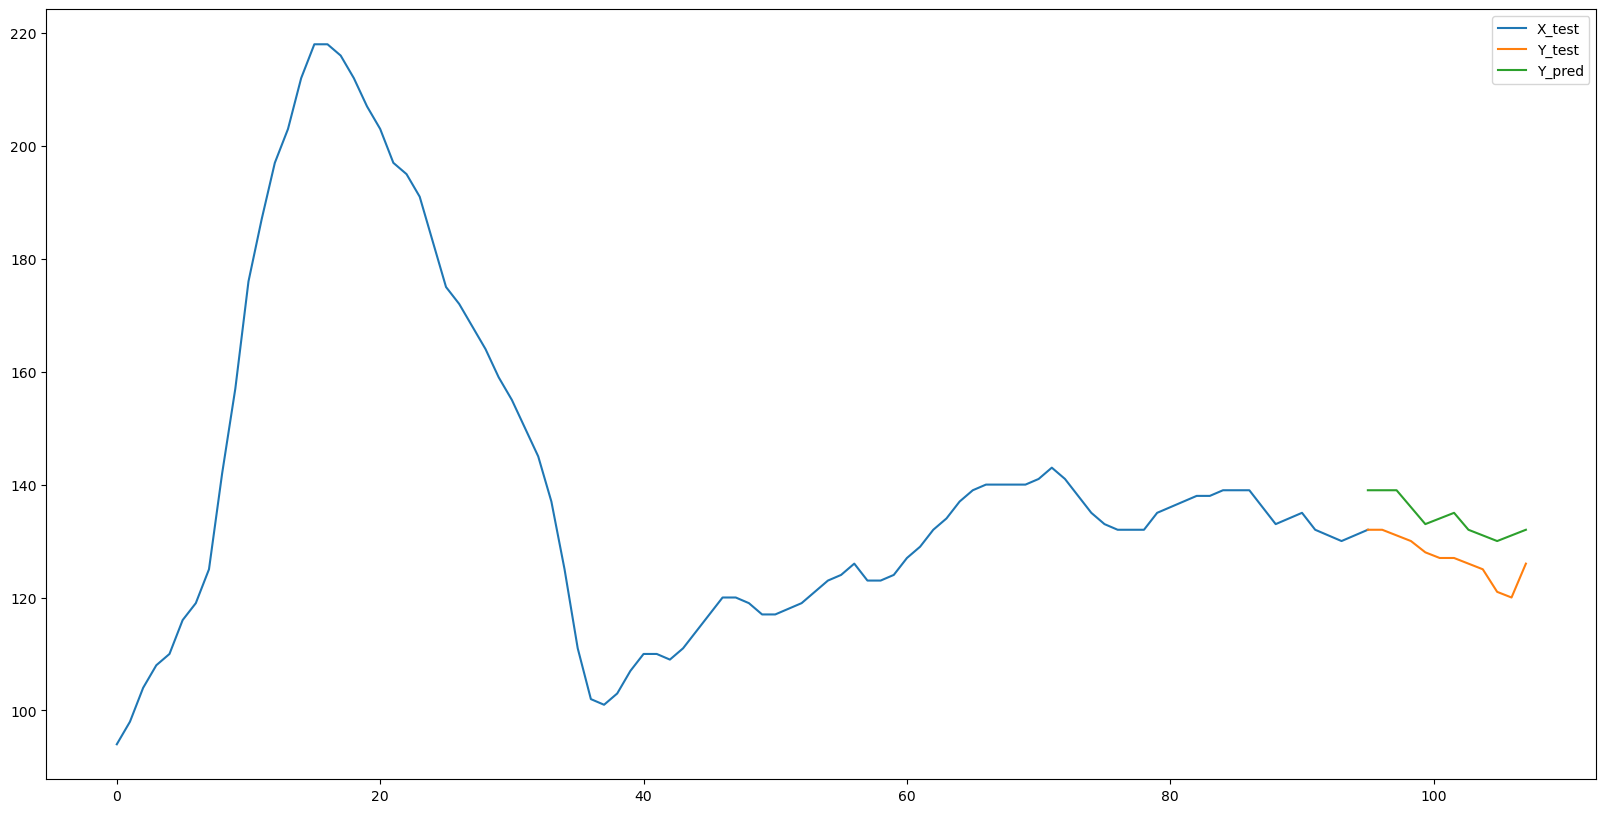

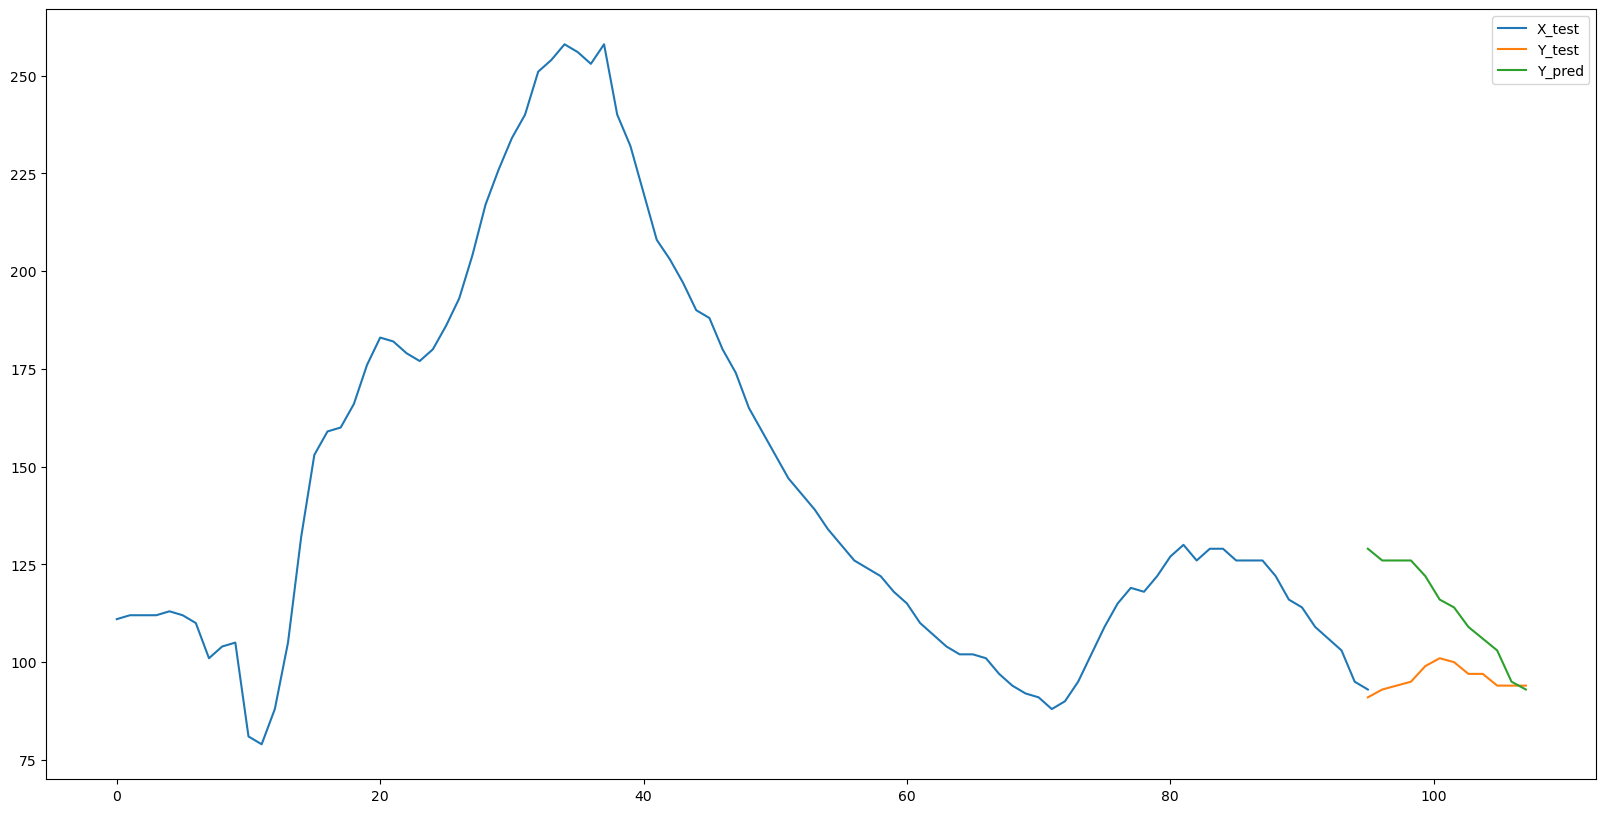

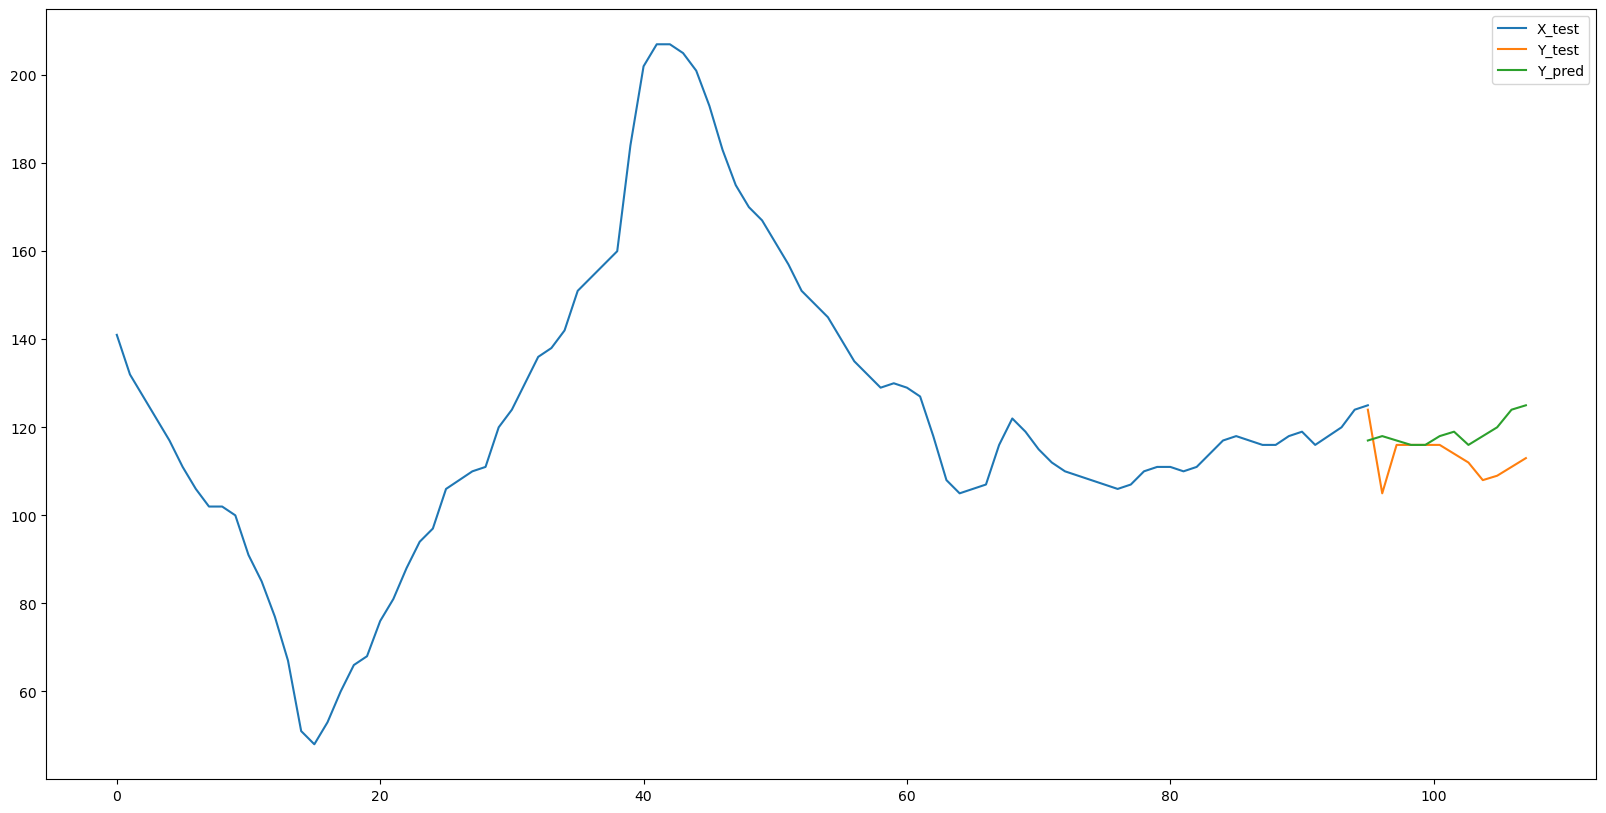

In [2]:

for sensors in range(len(test['sensor'])):
    for lengths in range(len(test['N'])):
        for steps in range(len(test['step'])):
            for PHs in range(len(test['PH'])):
                for predic_type in range(len(test['single_multi_step'])):
                    for partition in range(len(test['partition'])):
                        for norm_steps in range(len(test['normalization'])):
                            for under_over_samp in range(len(test['under_over_sampling'])):
                                for model_names in range(len(test['model'])):
                                    for loss_function in range(len(test['loss_function'])):
                            
                                        # Update parameters 
                                        sensor = test['sensor'][sensors]
                                        N = test['N'][lengths]
                                        step = test['step'][steps]
                                        PH = test['PH'][PHs]
                                        single_multi_step = test['single_multi_step'][predic_type]
                                        data_partition = test['partition'][partition]
                                        normalization = test['normalization'][norm_steps]
                                        under_over_sampling = test['under_over_sampling'][under_over_samp]
                                        model_name = test['model'][model_names]
                                        loss_function = test['loss_function'][loss_function]

                                        key = get_dictionary_key(sensor, single_multi_step, N, step, PH, data_partition, normalization, under_over_sampling, model_name, loss_function)

                                        # If not created the directory correspondant with this configuration, create it
                                        subdirectory = r"\{}\N{}\step{}\PH{}\{}\{}\norm_{}\{}_sampling\{}\{}".format(sensor["NAME"], N, step, PH, single_multi_step,
                                                                                                                    data_partition, normalization, under_over_sampling, model_name, loss_function)
                                        if not os.path.exists(parent_directory+experiments_folder+subdirectory):
                                            os.makedirs(parent_directory+experiments_folder+subdirectory)
                                        
                                        # Go to subdirectory 
                                        os.chdir(parent_directory+experiments_folder+subdirectory)

                                        # Counter
                                        i = i+1

                                        print("~~~~~~~~~~~~~~~~~~~~~~~~~~\nRunning experiment %d/%d:\n" % (i, total_exps))

                                        print("Configuration:\nsensor = %s\nN = %d\nstep = %d\nPH = %d\nsingle/multi step = %s\npartition = %s\nnorm = %s\nunder-over = %s\nmodel : %s\nloss funcion = %s\n" 
                                            % (sensor["NAME"], N, step, PH, single_multi_step, data_partition, normalization, under_over_sampling, model_name, loss_function))

                                        X, Y, X_times, Y_times = get_CGM_X_Y_multistep(sgv_data_dict, sensor, N, step, PH, experiments_folder, plot=False, verbose = 0)  

                                        X_norm = (X - np.min(X))/(np.max(X) - np.min(X))
                                        Y_norm = (Y - np.min(X))/(np.max(X) - np.min(X))

                                        X_train = X_norm[np.where(X_times[:,N-1] <= pd.to_datetime('2021-05-31 00:00:00'))[0]]
                                        Y_train = Y_norm[np.where((Y_times[:,0] < pd.to_datetime('2021-05-30 23:59:59')))[0]]
                                        X_test = X_norm[np.where((X_times[:,N-1] > pd.to_datetime('2021-06-01 00:00:00')))[0]]
                                        Y_test = Y_norm[np.where((Y_times[:,0] > pd.to_datetime('2021-06-01 00:00:00')))[0]] # Left non-normalized to compute the metrics

                                        predicted_points = PH/sensor['SAMPLE_PERIOD']

                                        print("Naive model evaluation. Training step not needed.")

                                        # Non-refeed evaluation
                                        results_normal_eval = multi_step_model_evaluation(N, PH, model_name, normalization, X_test, Y_test, predicted_points, X, loss_function)
                                        os.chdir('..')

                                        # # Refeed the model with the FIRST model output to evaluate the model. Aiming to reduce final error. 
                                        # results_refeed_eval = multi_step_model_evaluation_refeed(N, PH, model_name, normalization, X_test, Y_test, X)
                                        results_refeed_eval = []

                                        results_dictionary[key] = {'normal ': results_normal_eval, 'refeed': results_refeed_eval}
                                    
                                        # Stop when the counter is equal to the total number of experiments
                                        if i == total_exps:
                                            break

# Go to experiment folder
os.chdir(parent_directory+experiments_folder)

# Save updated dictionary 
with open('results_dictionary.json', 'w') as fp:
        json.dump(results_dictionary, fp)


In [ ]:
plt.figure()
plt.plot(X_test[0])


In [ ]:
aa = X_test[0]


In [ ]:
aa_jj = naive_model(X_test, round(predicted_points))
plt.plot(aa_jj[1])

In [ ]:
aa_jj[0]

In [ ]:
len(X_test[0])-round(predicted_points)-1

In [ ]:
len(X_test[0])

In [ ]:
len(aa_jj[0])

In [ ]:
plt.plot(X_test[0], 'r')
plt.plot(np.linspace(len(X_test[0])-round(predicted_points)-1, len(X_test[0]-1), round(predicted_points)), aa_jj[0], 'b')

In [ ]:
plt.plot(aa_jj[0])

In [ ]:
a_output = naive_model(X_test, round(predicted_points))

In [ ]:
for i in range (0, 2000, 200):
    plt.figure()
    plt.plot(X_test[i], 'k', label = "Test vector")
    plt.plot(np.linspace(len(X_test[0])-1, len(X_test[0])-1+round(predicted_points), round(predicted_points)), a_output[i, :], 'r', label = 'naive')
    plt.plot(np.linspace(len(X_test[0])-1, len(X_test[0])-1+round(predicted_points), round(predicted_points)), Y_test[i], 'b', label = 'GT')

In [ ]:
Y_pred = naive_model(X_test, round(predicted_points))

In [ ]:
Y_test[0]

In [ ]:
Y_pred.min()

In [ ]:
Y_pred[0]

In [ ]:
import numpy as np 

rmse = np.sqrt(np.square(np.subtract(Y_test,Y_pred)).mean(axis=0))
print("Test RMSE in each time step:  ", str(rmse))

# MAE
mae = np.mean(np.abs(Y_test-Y_pred), axis=0)
print("Test MAE in each time step:  ", str(mae))

# MAPE
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test), axis=0) * 100
print("Test MAPE in each time step:  ", str(mape))

In [ ]:
rmse

In [ ]:
rmse = np.sqrt(np.square(np.subtract(Y_test,Y_pred)).mean(axis=0))
print("Test RMSE in each time step:  ", str(rmse))

# MAE
mae = np.mean(np.abs(Y_test-Y_pred), axis=0)
print("Test MAE in each time step:  ", str(mae))

# MAPE
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test), axis=0) * 100
print("Test MAPE in each time step:  ", str(mape))

In [ ]:
results = multi_step_model_evaluation(N, PH, model_name, normalization, X_test, Y_test, predicted_points, X, loss_function)